In [1]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
top_countries = df['job_country'].value_counts().head(6).index
df_job_country_salary = df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')
df_job_country_salary = df_job_country_salary.loc[top_countries]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [3]:
job_title = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_country_salary = df_job_country_salary[job_title]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


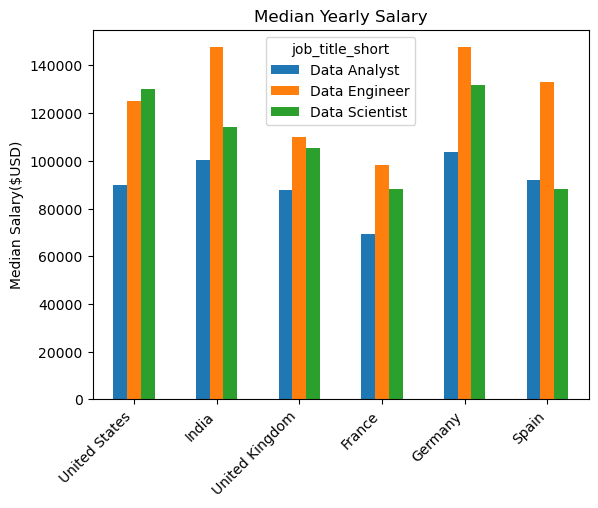

In [4]:
df_job_country_salary.plot(kind='bar')
plt.title('Median Yearly Salary')
plt.xlabel('')
plt.ylabel('Median Salary($USD)')
plt.xticks(rotation=45, ha='right')
plt.show()